- Nilai Numerik -> imputasi dengan mean
- NIlai kategori -> imputasi dengan nilai paling banyak muncul
- Outlier dengan -> z score

In [14]:
# import semua library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# import dataset ke dalam notebook
df = pd.read_csv('C:\\Users\\thebl\\Downloads\\Clone\\Intern-BCC-2024\\Dataset\\Raw\\climate_vs_flood.csv', header=0)
df

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood
0,2016-01-01,26.0,34.8,28.6,81.0,NaN,5.8,5.0,280.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
1,2016-01-02,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
2,2016-01-03,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
3,2016-01-04,24.8,33.6,29.2,81.0,NaN,6.6,3.0,200.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
4,2016-01-05,25.8,33.6,26.7,91.0,NaN,3.2,3.0,180.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,23.8,32.0,28.0,70.0,NaN,NaN,12.0,180.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6304,2018-12-28,24.0,33.4,28.5,69.0,NaN,NaN,14.0,250.0,3.0,SE,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6305,2018-12-29,25.2,33.4,28.7,70.0,NaN,NaN,14.0,120.0,5.0,SW,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6306,2018-12-30,24.0,34.4,30.0,64.0,NaN,NaN,14.0,240.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0


In [16]:
df_copy = df.copy()

Imputasi dengan nilai mean

In [17]:
fitur_fitur = ['Tx', 'Tn', 'Tavg', 'RH_avg', 'ss','RR', 'ff_x', 'ff_avg', 'ddd_x']
for column in fitur_fitur:
    df_copy[column] = df_copy[column].fillna(df_copy[column].mean())

In [18]:
df_copy.isnull().sum()

date              0
Tn                0
Tx                0
Tavg              0
RH_avg            0
RR                0
ss                0
ff_x              0
ddd_x             0
ff_avg            0
ddd_car         101
station_id        0
station_name      0
region_name       0
flood             0
dtype: int64

Imputasi nilai kategori dengan paling banyak muncul

In [19]:
mode_ddd_car = df_copy['ddd_car'].mode()[0]
df_copy['ddd_car'] = df_copy['ddd_car'].fillna(mode_ddd_car)

In [20]:
df_copy.isnull().sum()

date            0
Tn              0
Tx              0
Tavg            0
RH_avg          0
RR              0
ss              0
ff_x            0
ddd_x           0
ff_avg          0
ddd_car         0
station_id      0
station_name    0
region_name     0
flood           0
dtype: int64

Outliers Z-Score

In [21]:
def remove_outliers_and_visualize(df, df_copy, features, threshold=3):
    for feature in features:
        # Menghitung Z-score untuk fitur
        z_scores = (df_copy[feature] - df_copy[feature].mean()) / df_copy[feature].std()
        
        outliers = df_copy[(abs(z_scores) > threshold)]
        
        # Hapus outlier dari DataFrame salinan
        df_copy = df_copy.drop(outliers.index)
        
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        
        # Boxplot sebelum penghapusan outlier
        sns.boxplot(x=feature, data=df, ax=axs[0], color='skyblue')
        axs[0].set_title(f'Boxplot of {feature} (Before Outlier Removal)')
        
        # Boxplot setelah penghapusan outlier
        sns.boxplot(x=feature, data=df_copy, ax=axs[1], color='skyblue')
        axs[1].set_title(f'Boxplot of {feature} (After Outlier Removal)')
        
        plt.tight_layout()
        plt.show()

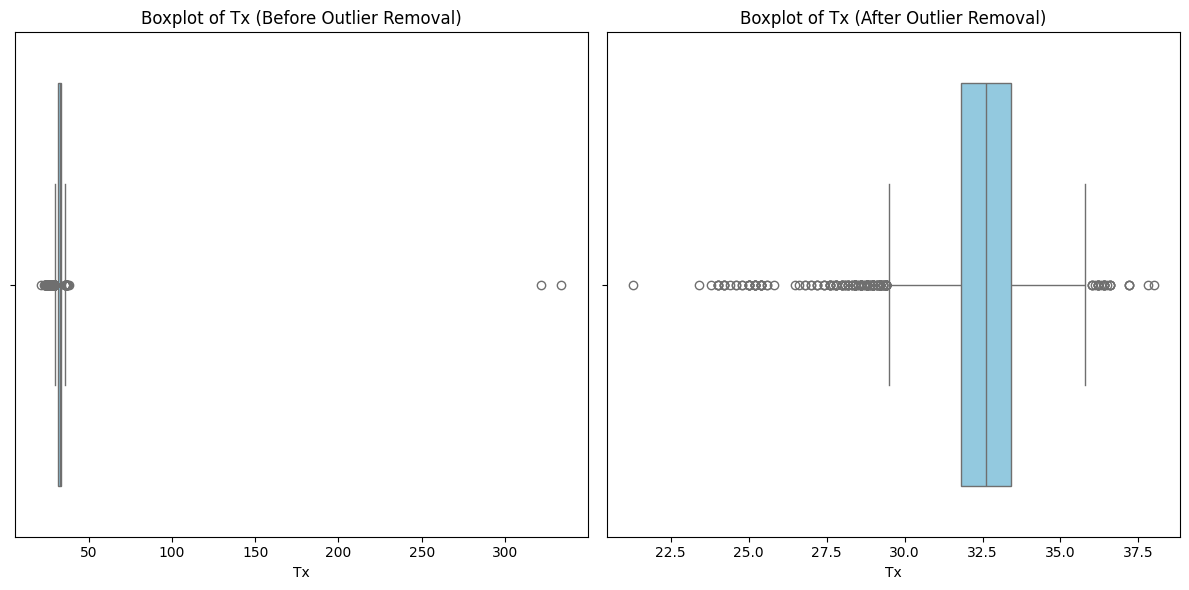

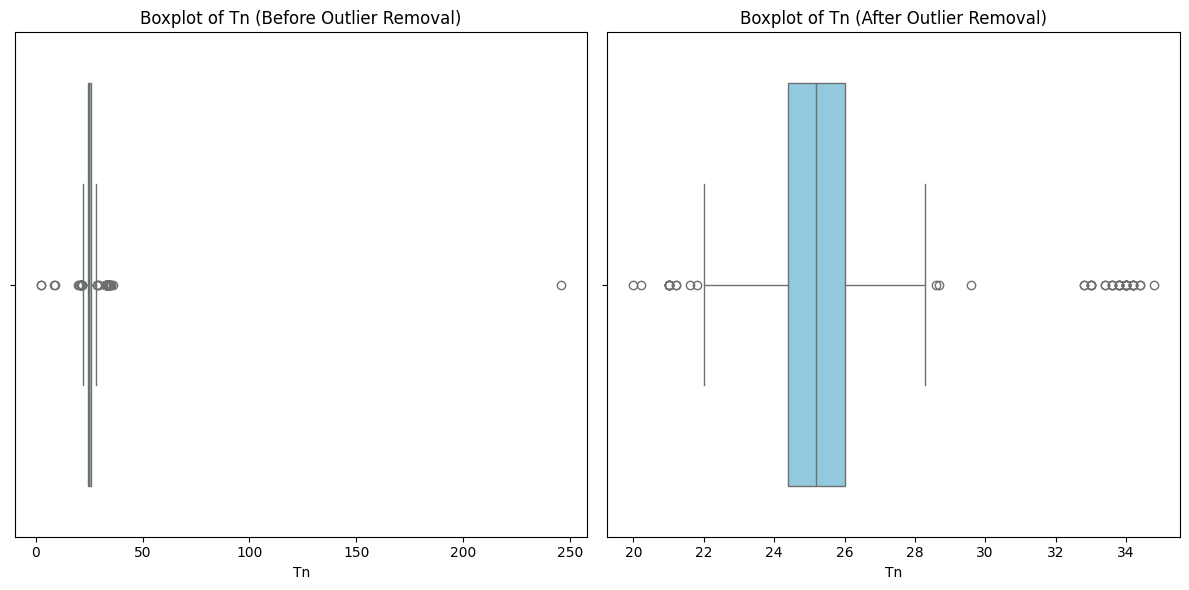

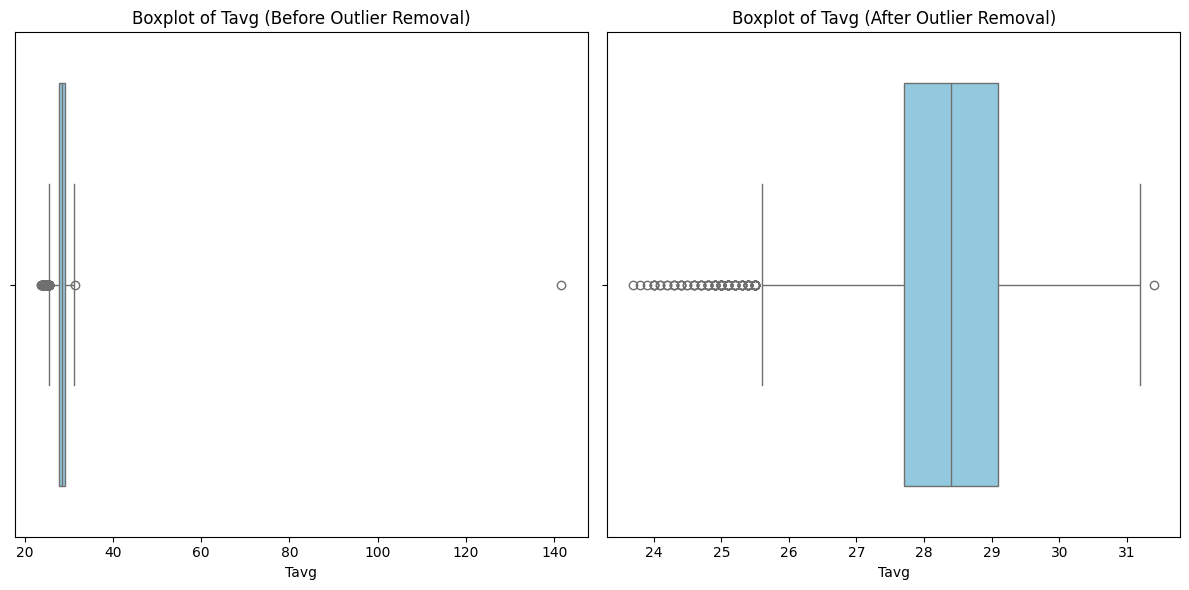

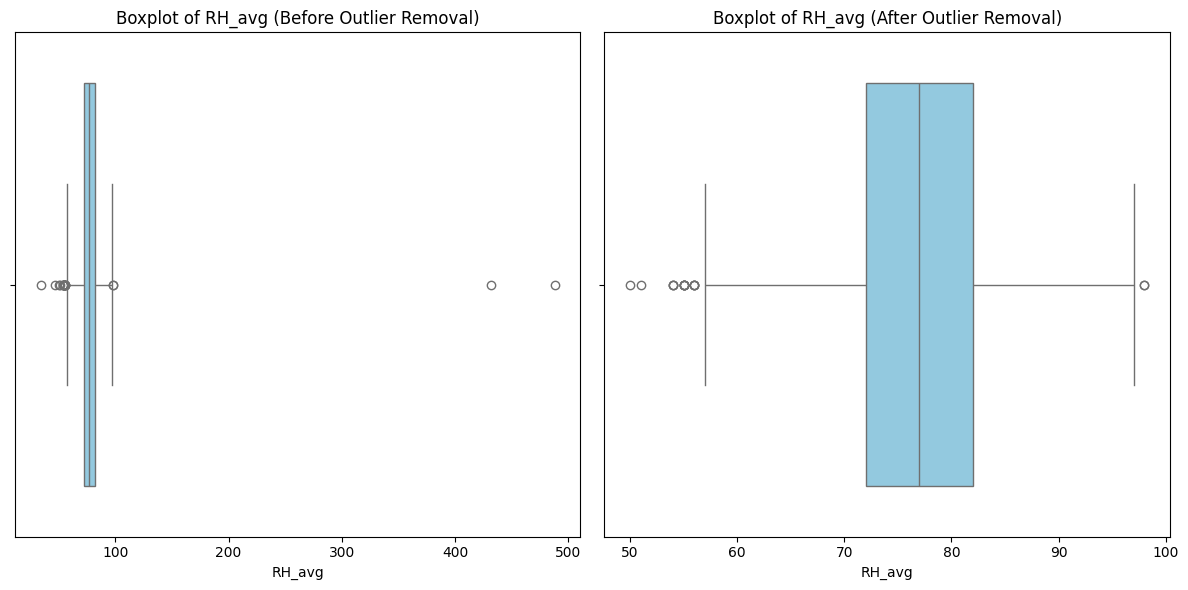

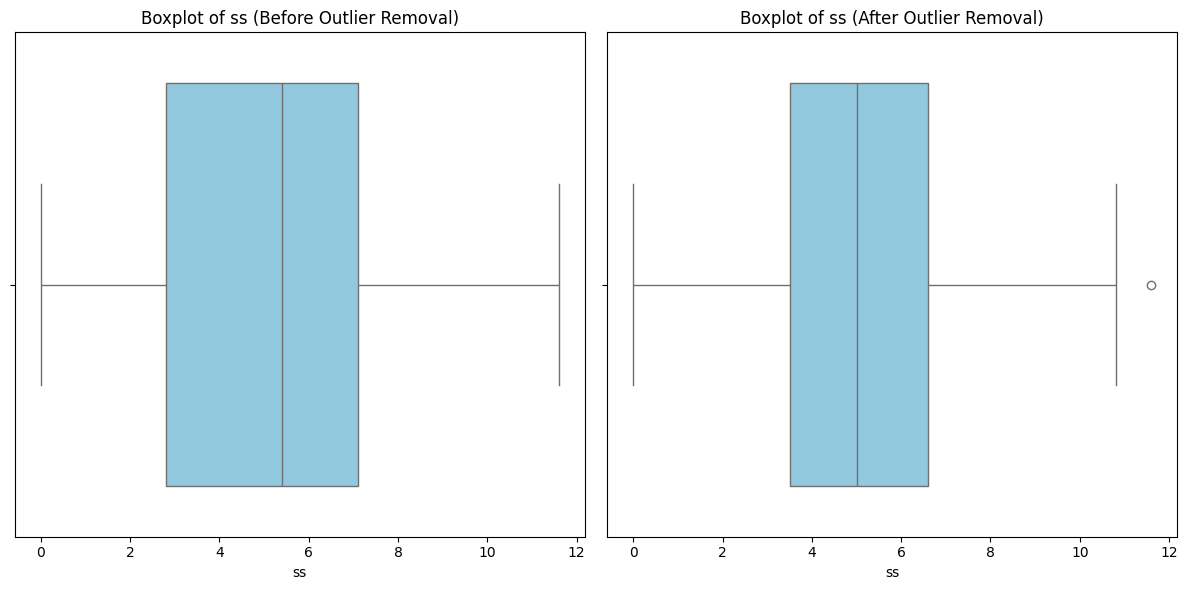

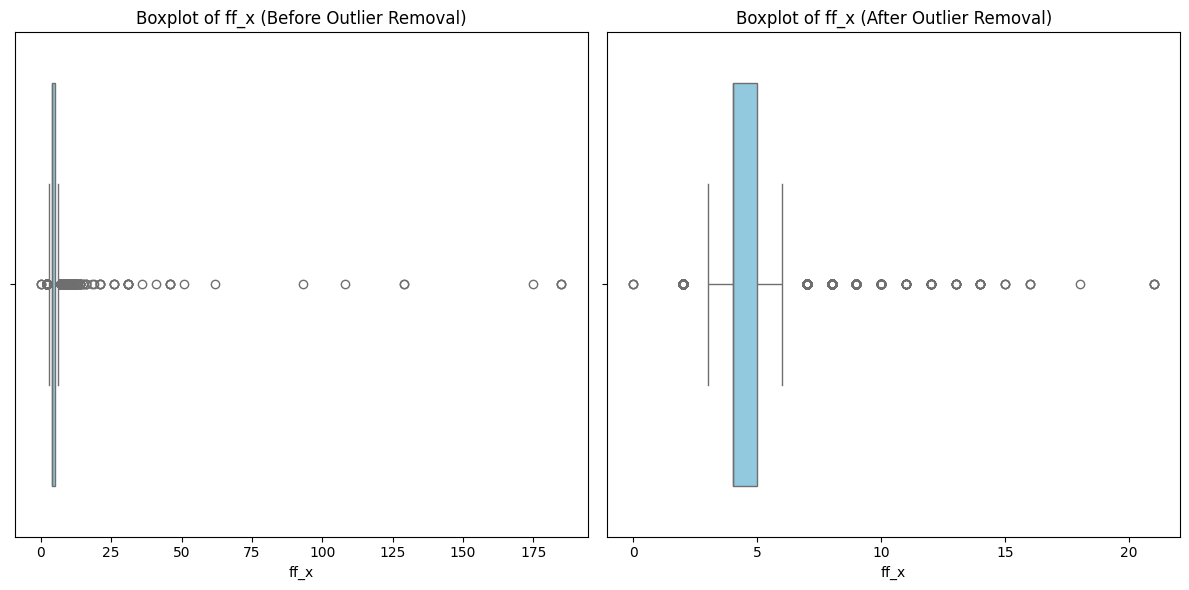

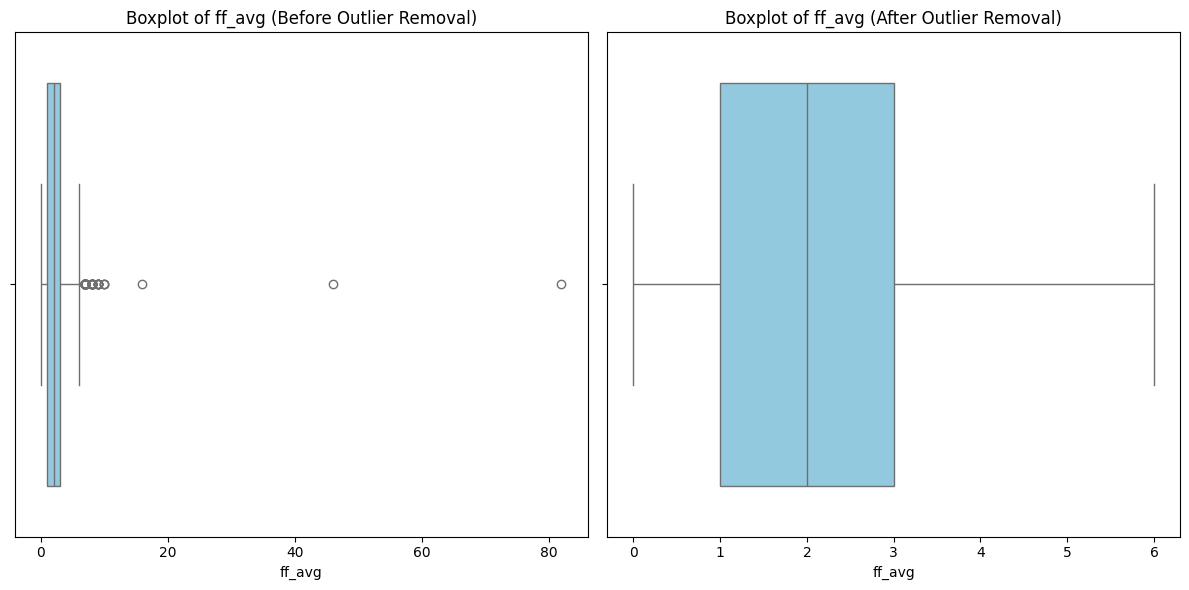

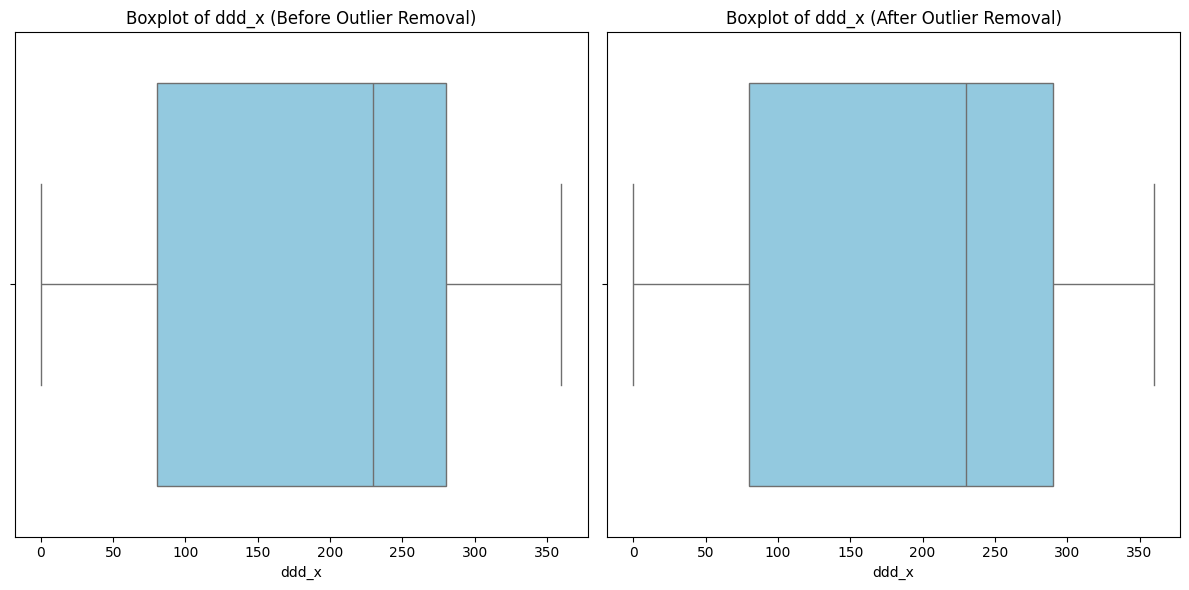

In [22]:
fitur_fitur = ['Tx', 'Tn', 'Tavg', 'RH_avg', 'ss', 'ff_x', 'ff_avg', 'ddd_x']
remove_outliers_and_visualize(df,df_copy, fitur_fitur)


In [23]:
#Cek kembali data setelah di handling
df_copy.isnull().sum()

date            0
Tn              0
Tx              0
Tavg            0
RH_avg          0
RR              0
ss              0
ff_x            0
ddd_x           0
ff_avg          0
ddd_car         0
station_id      0
station_name    0
region_name     0
flood           0
dtype: int64

In [24]:
num_col = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
cat_col = ['ddd_car','region_name']
target = ['flood']

In [25]:
df_train = pd.concat([df_copy[num_col], df_copy[cat_col]], axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tn           6308 non-null   float64
 1   Tx           6308 non-null   float64
 2   Tavg         6308 non-null   float64
 3   RH_avg       6308 non-null   float64
 4   RR           6308 non-null   float64
 5   ss           6308 non-null   float64
 6   ff_x         6308 non-null   float64
 7   ddd_x        6308 non-null   float64
 8   ff_avg       6308 non-null   float64
 9   ddd_car      6308 non-null   object 
 10  region_name  6308 non-null   object 
dtypes: float64(9), object(2)
memory usage: 542.2+ KB


In [26]:
df_train_dummied = pd.get_dummies(df_train, columns=['ddd_car', 'region_name'], drop_first=True)

In [27]:
from imblearn.over_sampling import RandomOverSampler    
X = df_train_dummied
y = df_copy[target]

# Inisialisasi RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Melakukan oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Menampilkan jumlah sampel setelah oversampling
print("Jumlah sampel setelah oversampling:")
print(y_resampled.value_counts())

Jumlah sampel setelah oversampling:
flood
0        5832
1        5832
Name: count, dtype: int64


In [28]:
from sklearn.model_selection import train_test_split

# Pembagian dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 9331
Jumlah data uji: 2333


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [30]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9858551221603086


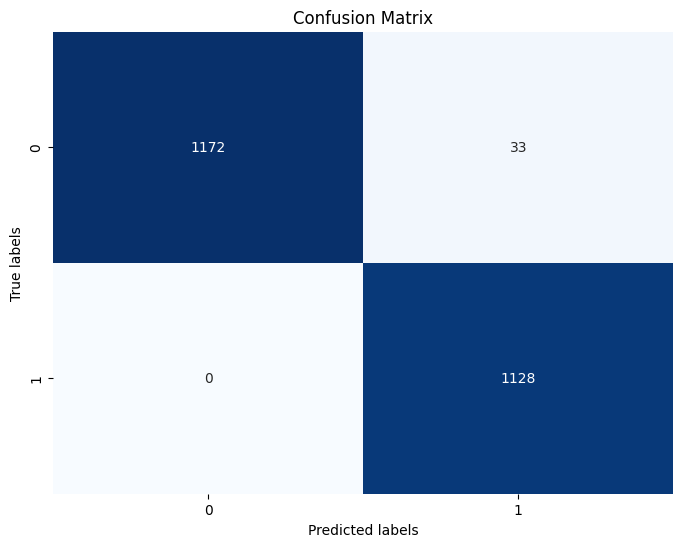

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()